#Import package and data

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
df_production = pd.read_csv('production_all_wheat.csv')
df_production_bowman = pd.read_csv('production_all_wheat_bowman.csv')
df_meteo_central= pd.read_csv('meteo_central_1990-2023.csv')
df_meteo_north= pd.read_csv('meteo_north_1993-2023.csv')
df_meteo_south= pd.read_csv('meteo_south_1993-2023.csv')
df_meteo_south_east= pd.read_csv('meteo_south_east_1993-2023.csv')
df_meteo_south_west= pd.read_csv('meteo_south_west_1993-2023.csv')
df_meteo_all = pd.read_csv('meteo_all.csv')
df_meteo_bowman = pd.read_csv('meteo_bowman_1993-2022.csv')
columns_to_eliminate = [
    'Number Missing', 'Number Estimated', 'Number Missing.1', 'Number Estimated.1',
    'Number Missing.2', 'Number Estimated.2', 'Number Missing.3', 'Number Estimated.3',
    'Number Missing.4', 'Number Estimated.4', 'Number Missing.5', 'Number Estimated.5',
    'Number Missing.6', 'Number Estimated.6', 'Number Missing.7', 'Number Estimated.7',
    'Number Missing.8', 'Number Estimated.8', 'Number Missing.9', 'Number Estimated.9',
    'Number Missing.10', 'Number Estimated.10', 'Number Missing.11', 'Number Estimated.11',
    'Number Missing.12', 'Number Estimated.12', 'Longitude', 'Latitude', 'Elevation'
]
df_meteo_all = df_meteo_all.drop(columns=columns_to_eliminate)

In [213]:
df_meteo_all

,Station Name,Year,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,Ada,2008,48.805,27.007,37.906,46.136,44.290,9.331,23.172,327.078,0.123,44.847,23.991,30.436,32.039
1,Ada,2009,48.829,28.264,38.546,46.188,43.826,8.877,21.612,315.992,0.116,42.469,16.130,31.454,33.258
2,Ada,2010,52.036,31.599,41.818,49.226,46.901,8.699,21.619,315.742,0.124,45.290,23.359,34.287,37.458
3,Ada,2011,51.884,30.835,41.359,48.846,46.514,9.043,22.533,330.723,0.130,47.308,13.587,33.075,36.160
4,Ada,2012,55.731,32.972,44.352,49.627,47.565,9.059,22.627,317.275,0.154,56.535,11.336,33.811,40.149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,Wolverton,2022,50.998,29.237,40.118,49.372,47.164,9.616,24.869,326.676,0.150,54.762,16.665,31.964,33.837
2142,Zeeland,2019,47.522,28.316,37.919,45.734,43.951,8.936,23.589,329.778,0.109,39.816,23.618,31.508,31.632
2143,Zeeland,2020,53.766,29.738,41.752,47.377,44.634,8.760,24.853,365.834,0.141,51.775,10.054,33.494,37.034
2144,Zeeland,2021,57.368,29.836,43.602,47.871,45.087,8.378,24.685,350.020,0.162,59.118,14.158,32.798,39.606


In [214]:
df_meteo_central.columns

Index(['Station Name', 'Latitude', 'Longitude', 'Elevation', 'Year',
       'Max Temp', 'Number Missing', 'Number Estimated', 'Min Temp',
       'Number Missing.1', 'Number Estimated.1', 'Avg Temp',
       'Number Missing.2', 'Number Estimated.2', 'Avg Bare Soil Temp',
       'Number Missing.3', 'Number Estimated.3', 'Avg Turf Soil Temp',
       'Number Missing.4', 'Number Estimated.4', 'Avg Wind Speed',
       'Number Missing.5', 'Number Estimated.5', 'Max Wind Speed',
       'Number Missing.6', 'Number Estimated.6', 'Total Solar Rad',
       'Number Missing.7', 'Number Estimated.7', 'Avg Penman PET',
       'Number Missing.8', 'Number Estimated.8', 'Total Penman PET',
       'Number Missing.9', 'Number Estimated.9', 'Total Rainfall',
       'Number Missing.10', 'Number Estimated.10', 'Avg Dew Point',
       'Number Missing.11', 'Number Estimated.11', 'Avg Wind Chill',
       'Number Missing.12', 'Number Estimated.12'],
      dtype='object')

#Principle Component Analysis

This is the step to reduce the variables of meteorology data for further processing

Normalization

In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
meteo_factors = df_meteo_all.iloc[:, 2:]
std_scale = StandardScaler().fit(meteo_factors)
meteo_factors_scaled = std_scale.transform(meteo_factors)

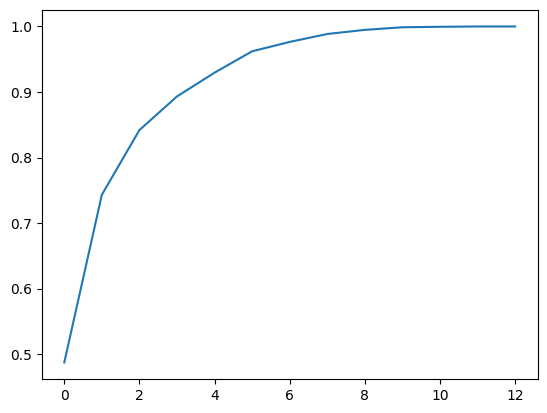

In [216]:
pca = PCA().fit(meteo_factors_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

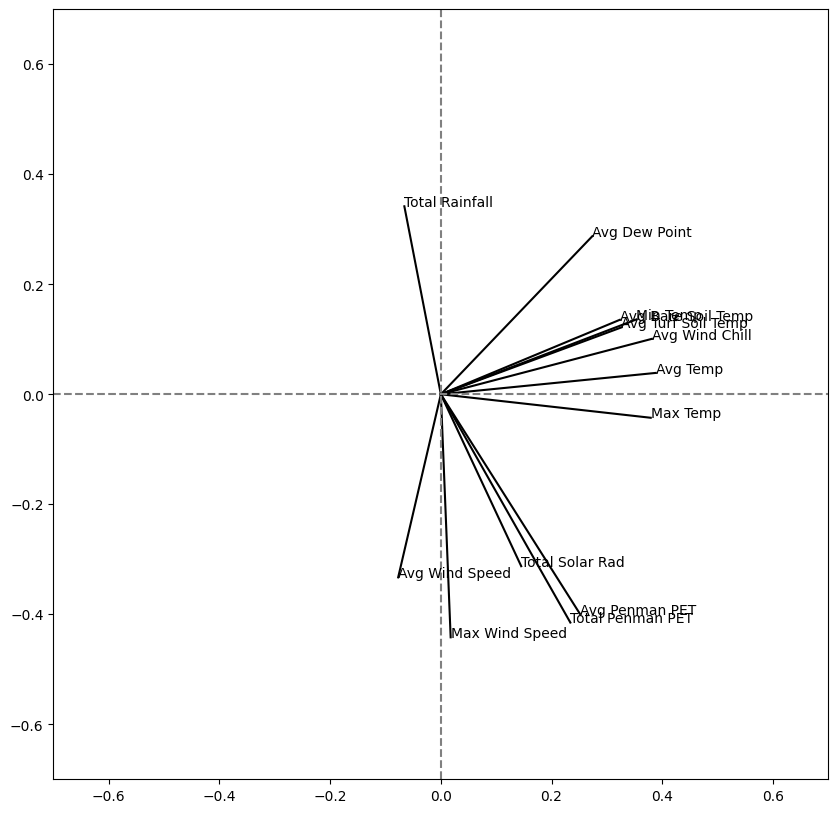

In [217]:
components = pca.components_
plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, meteo_factors.columns[i])

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7);

In the PCA correlation circle, features which have similar weights in the principal components are correlated. And if it's in the same direction, we can remove some features to facilitate future processing. So we decided to retain the following features:
1.   Total Rainfall
2.   Avg Wind Speed
3.   Max Wind Speed
4.   Avg Dew Point
5.   Total Solar Rad
6.   Avg Penman PET
7.   Avg Temp
8.   Max Temp
9.   Avg Wind chill
10.   Avg Bare Soil Temp

And removed ***Total Penman PET***, ***Min Temp*** and ***Avg Turf Soil Temp***






#Data Preparation

In [218]:
columns_to_eliminate = [
    'Number Missing', 'Number Estimated', 'Number Missing.1', 'Number Estimated.1',
    'Number Missing.2', 'Number Estimated.2', 'Number Missing.3', 'Number Estimated.3',
    'Number Missing.4', 'Number Estimated.4', 'Number Missing.5', 'Number Estimated.5',
    'Number Missing.6', 'Number Estimated.6', 'Number Missing.7', 'Number Estimated.7',
    'Number Missing.8', 'Number Estimated.8', 'Number Missing.9', 'Number Estimated.9',
    'Number Missing.10', 'Number Estimated.10', 'Number Missing.11', 'Number Estimated.11',
    'Number Missing.12', 'Number Estimated.12', 'Longitude', 'Latitude', 'Elevation', 'Station Name',
    "Total Penman PET", "Min Temp", "Avg Turf Soil Temp"
]

# Drop the specified columns
df_meteo_central = df_meteo_central.drop(columns=columns_to_eliminate)
df_meteo_north = df_meteo_north.drop(columns=columns_to_eliminate)
df_meteo_south = df_meteo_south.drop(columns=columns_to_eliminate)
df_meteo_south_east = df_meteo_south_east.drop(columns=columns_to_eliminate)
df_meteo_south_west = df_meteo_south_west.drop(columns=columns_to_eliminate)
df_meteo_bowman = df_meteo_bowman.drop(columns=columns_to_eliminate)

In [219]:
months_to_retain_winter = [9,10,11,12,1,2,3,4,5]
df_meteo_bowman_winter_wheat = df_meteo_bowman[df_meteo_bowman['Month'].isin(months_to_retain_winter)]
months_to_retain_spring = [3,4,5,6,7,8,9]
df_meteo_bowman_spring_wheat = df_meteo_bowman[df_meteo_bowman['Month'].isin(months_to_retain_spring)]

In [220]:
df_meteo_bowman_spring_wheat

,Year,Month,Max Temp,Avg Temp,Avg Bare Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
2,1993,3,42.754,32.842,32.674,10.741,24.268,317.387,0.080,NaN,27.423,23.115
3,1993,4,52.490,41.224,43.771,9.750,23.981,419.769,0.140,1.180,32.979,35.824
4,1993,5,66.347,53.806,58.573,9.883,25.749,516.109,0.236,1.030,40.164,52.953
5,1993,6,68.293,57.187,62.384,11.259,28.581,517.988,0.219,4.440,48.653,56.639
6,1993,7,70.476,60.908,64.163,9.894,25.216,461.731,0.178,4.870,54.768,60.489
...,...,...,...,...,...,...,...,...,...,...,...,...
352,2022,5,62.508,50.107,53.547,10.466,30.050,503.941,0.245,1.767,37.878,47.527
353,2022,6,72.962,60.939,64.700,8.283,27.545,562.132,0.277,4.373,49.788,60.524
354,2022,7,84.254,70.078,74.226,6.762,25.239,642.282,0.338,2.504,56.474,70.584
355,2022,8,87.093,71.194,73.040,6.948,22.613,487.568,0.331,0.416,51.954,71.149


In [221]:
df_meteo_bowman_winter_wheat = df_meteo_bowman_winter_wheat.groupby('Year').mean().reset_index()
df_meteo_bowman_winter_wheat = df_meteo_bowman_winter_wheat.drop(['Month'], axis = 1)
df_meteo_bowman_spring_wheat = df_meteo_bowman_spring_wheat.groupby('Year').mean().reset_index()
df_meteo_bowman_spring_wheat = df_meteo_bowman_spring_wheat.drop(['Month'], axis = 1)

In [222]:
df_meteo_central = df_meteo_central.drop(0)
df_meteo_central = df_meteo_central.astype(float, errors='ignore')
df_meteo_north = df_meteo_north.drop(0)
df_meteo_north = df_meteo_north.astype(float, errors='ignore')
df_meteo_south = df_meteo_south.drop(0)
df_meteo_south = df_meteo_south.astype(float, errors='ignore')
df_meteo_south_east = df_meteo_south_east.drop(0)
df_meteo_south_east = df_meteo_south_east.astype(float, errors='ignore')
df_meteo_south_west = df_meteo_south_west.astype(float, errors='ignore')

In [223]:
df_production['Value'] = df_production['Value'].str.replace(',', '').astype(float)
df_production.head(1)
df_production_bowman['Value'] = df_production_bowman['Value'].str.replace(',', '').astype(float)

In [224]:
df_production = df_production.pivot(index=['Year','Ag District'],
                      columns='Data Item', values='Value').reset_index()
df_production_bowman = df_production_bowman.pivot(index=['Year'],
                      columns='Data Item', values='Value').reset_index()


In [225]:
df_production_central = df_production[df_production['Ag District'].isin(['CENTRAL'])]

df_production_north = df_production[df_production['Ag District'].isin(['NORTH CENTRAL'])]

df_production_south = df_production[df_production['Ag District'].isin(['SOUTH CENTRAL'])]

df_production_south_east = df_production[df_production['Ag District'].isin(['SOUTHEAST'])]

df_production_south_west = df_production[df_production['Ag District'].isin(['SOUTHWEST'])]

In [226]:
print("Shape of df_production_central:", df_production_central.shape)
print("Shape of df_production_north:", df_production_north.shape)
print("Shape of df_production_south:", df_production_south.shape)
print("Shape of df_production_south_east:", df_production_south_east.shape)
print("Shape of df_production_south_west:", df_production_south_west.shape)

Shape of df_production_central: (30, 10)
Shape of df_production_north: (30, 10)
Shape of df_production_south: (30, 10)
Shape of df_production_south_east: (30, 10)
Shape of df_production_south_west: (30, 10)


#spring

In [227]:
df_production_bowman.columns

Index(['Year', 'WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED',
       'WHEAT, SPRING, (EXCL DURUM) - ACRES PLANTED',
       'WHEAT, SPRING, (EXCL DURUM) - YIELD, MEASURED IN BU / ACRE',
       'WHEAT, SPRING, DURUM - ACRES HARVESTED',
       'WHEAT, SPRING, DURUM - ACRES PLANTED',
       'WHEAT, SPRING, DURUM - YIELD, MEASURED IN BU / ACRE',
       'WHEAT, WINTER - ACRES HARVESTED', 'WHEAT, WINTER - ACRES PLANTED',
       'WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE',
       'WHEAT, WINTER - YIELD, MEASURED IN BU / NET PLANTED ACRE'],
      dtype='object', name='Data Item')

In [228]:
columns_to_keep = ['Year','WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED',
       'WHEAT, SPRING, (EXCL DURUM) - ACRES PLANTED',
       'WHEAT, SPRING, (EXCL DURUM) - YIELD, MEASURED IN BU / ACRE',
       'WHEAT, SPRING, DURUM - ACRES HARVESTED',
       'WHEAT, SPRING, DURUM - ACRES PLANTED',
       'WHEAT, SPRING, DURUM - YIELD, MEASURED IN BU / ACRE']

columns_to_drop = [col for col in df_production_bowman.columns if col not in columns_to_keep]
df_production_bowman_spring_durum = df_production_bowman.drop(columns=columns_to_drop)

columns_to_keep = ['Year', 'WHEAT, WINTER - ACRES HARVESTED', 'WHEAT, WINTER - ACRES PLANTED',
       'WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE',
       'WHEAT, WINTER - YIELD, MEASURED IN BU / NET PLANTED ACRE']
columns_to_drop = [col for col in df_production_bowman.columns if col not in columns_to_keep]
df_production_bowman_winter = df_production_bowman.drop(columns=columns_to_drop)


In [229]:
meteo_production_bowman_df.shape

(29, 14)

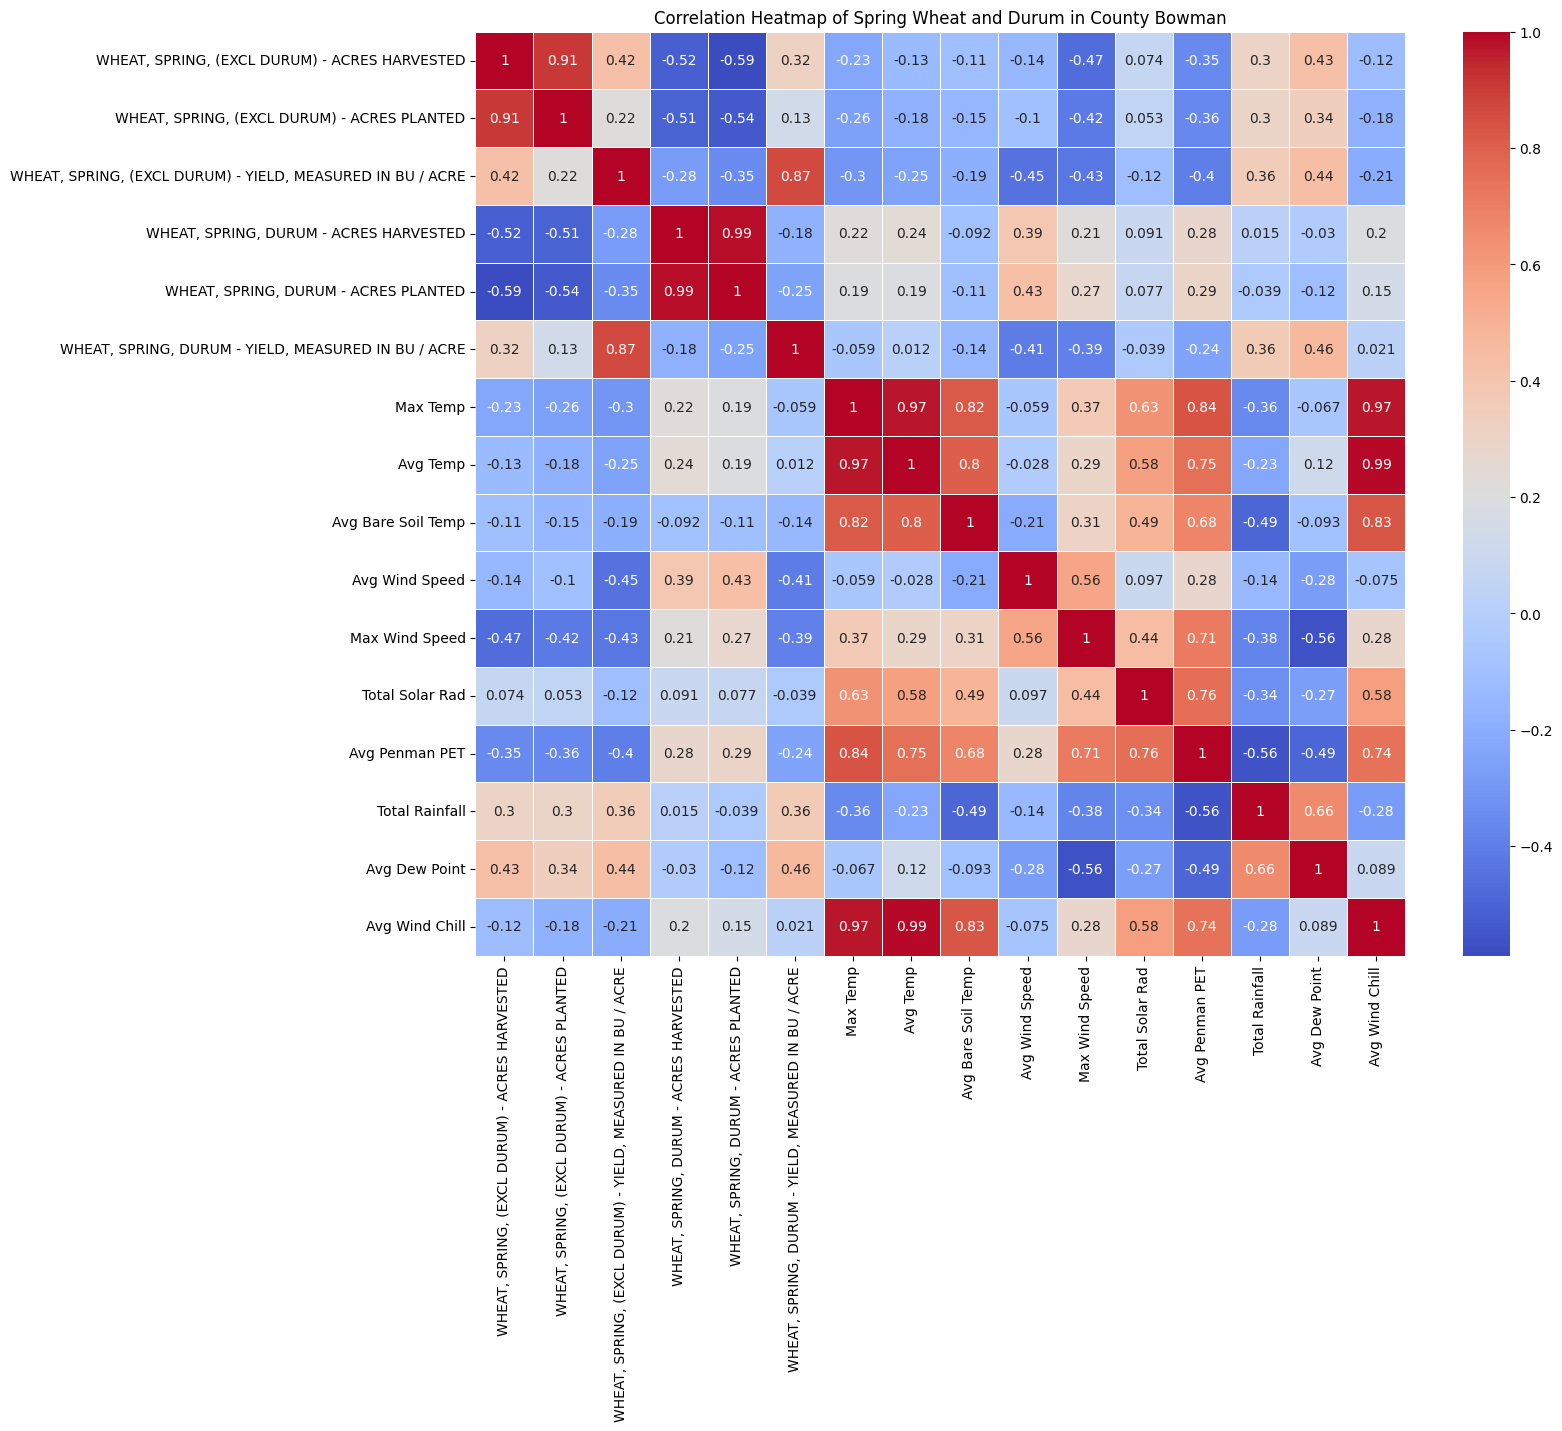

In [230]:
meteo_production_bowman_df = df_production_bowman_spring_durum.merge(df_meteo_bowman_spring_wheat, on=time_column)
meteo_production_bowman_df = meteo_production_bowman_df.drop(['Year'], axis =1)
correlation_matrix = meteo_production_bowman_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Spring Wheat and Durum in County Bowman")

# Show the heatmap
plt.show()

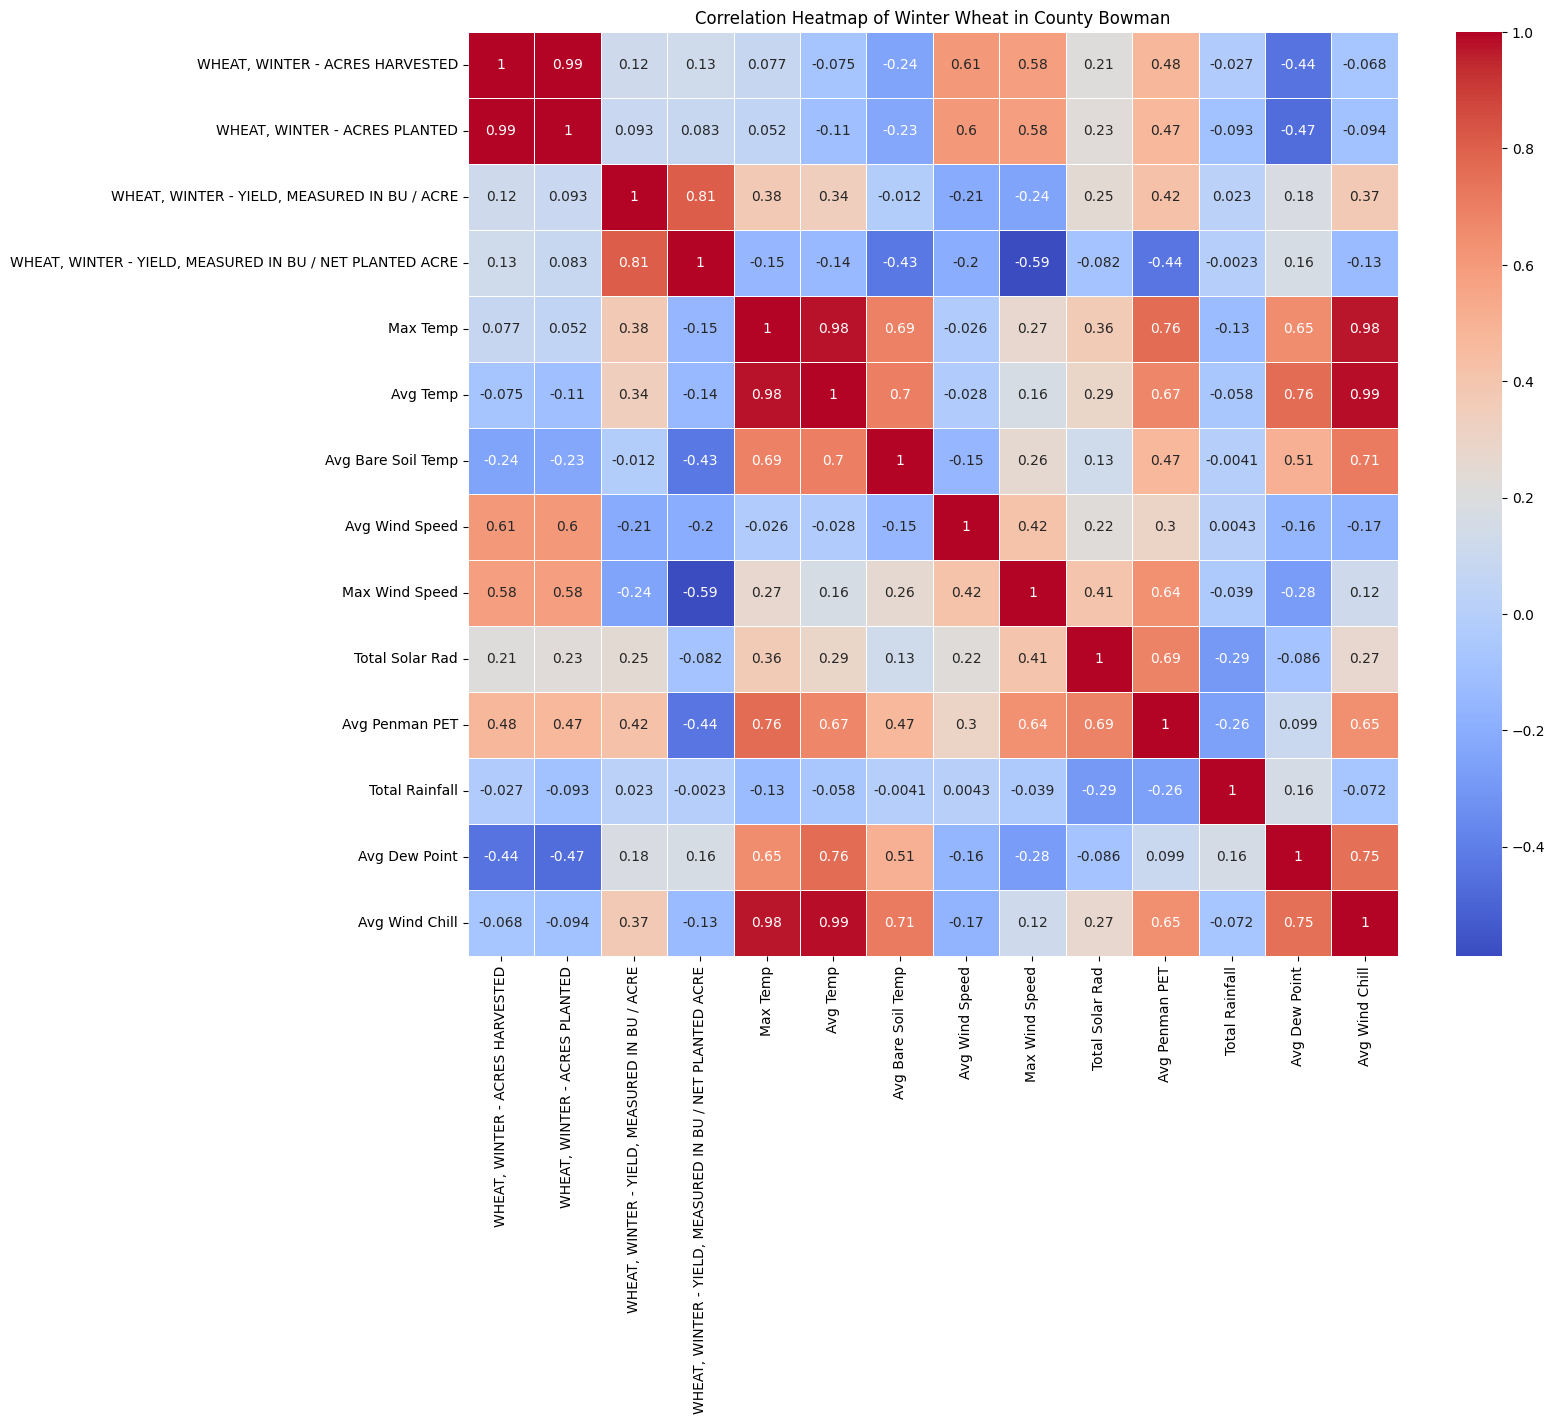

In [231]:
meteo_production_bowman_df = df_production_bowman_winter.merge(df_meteo_bowman_winter_wheat, on=time_column)
meteo_production_bowman_df = meteo_production_bowman_df.drop(['Year'], axis =1)
correlation_matrix = meteo_production_bowman_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Winter Wheat in County Bowman")

# Show the heatmap
plt.show()

In [ ]:
columns_to_keep = ['Year','WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED',
                  'WHEAT, SPRING, (EXCL DURUM) - ACRES PLANTED',
                  'WHEAT, SPRING, DURUM - ACRES HARVESTED',
                  'WHEAT, SPRING, DURUM - ACRES PLANTED']
columns_to_drop = [col for col in df_production.columns if col not in columns_to_keep]
df_production_central = df_production_central.drop(columns=columns_to_drop)
df_production_north = df_production_north.drop(columns=columns_to_drop)
df_production_south = df_production_south.drop(columns=columns_to_drop)
df_production_south_east = df_production_south_east.drop(columns=columns_to_drop)
df_production_south_west = df_production_south_west.drop(columns=columns_to_drop)


#Merge meteorology data with production data
## In this step, we will merge the production data of each agricultural district with meteorology data of that district.
## And then, we will find the correlation between those features.

In [ ]:
time_column = ['Year']

<ipython-input-170-da9dcb52320d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = meteo_production_central_df.corr()


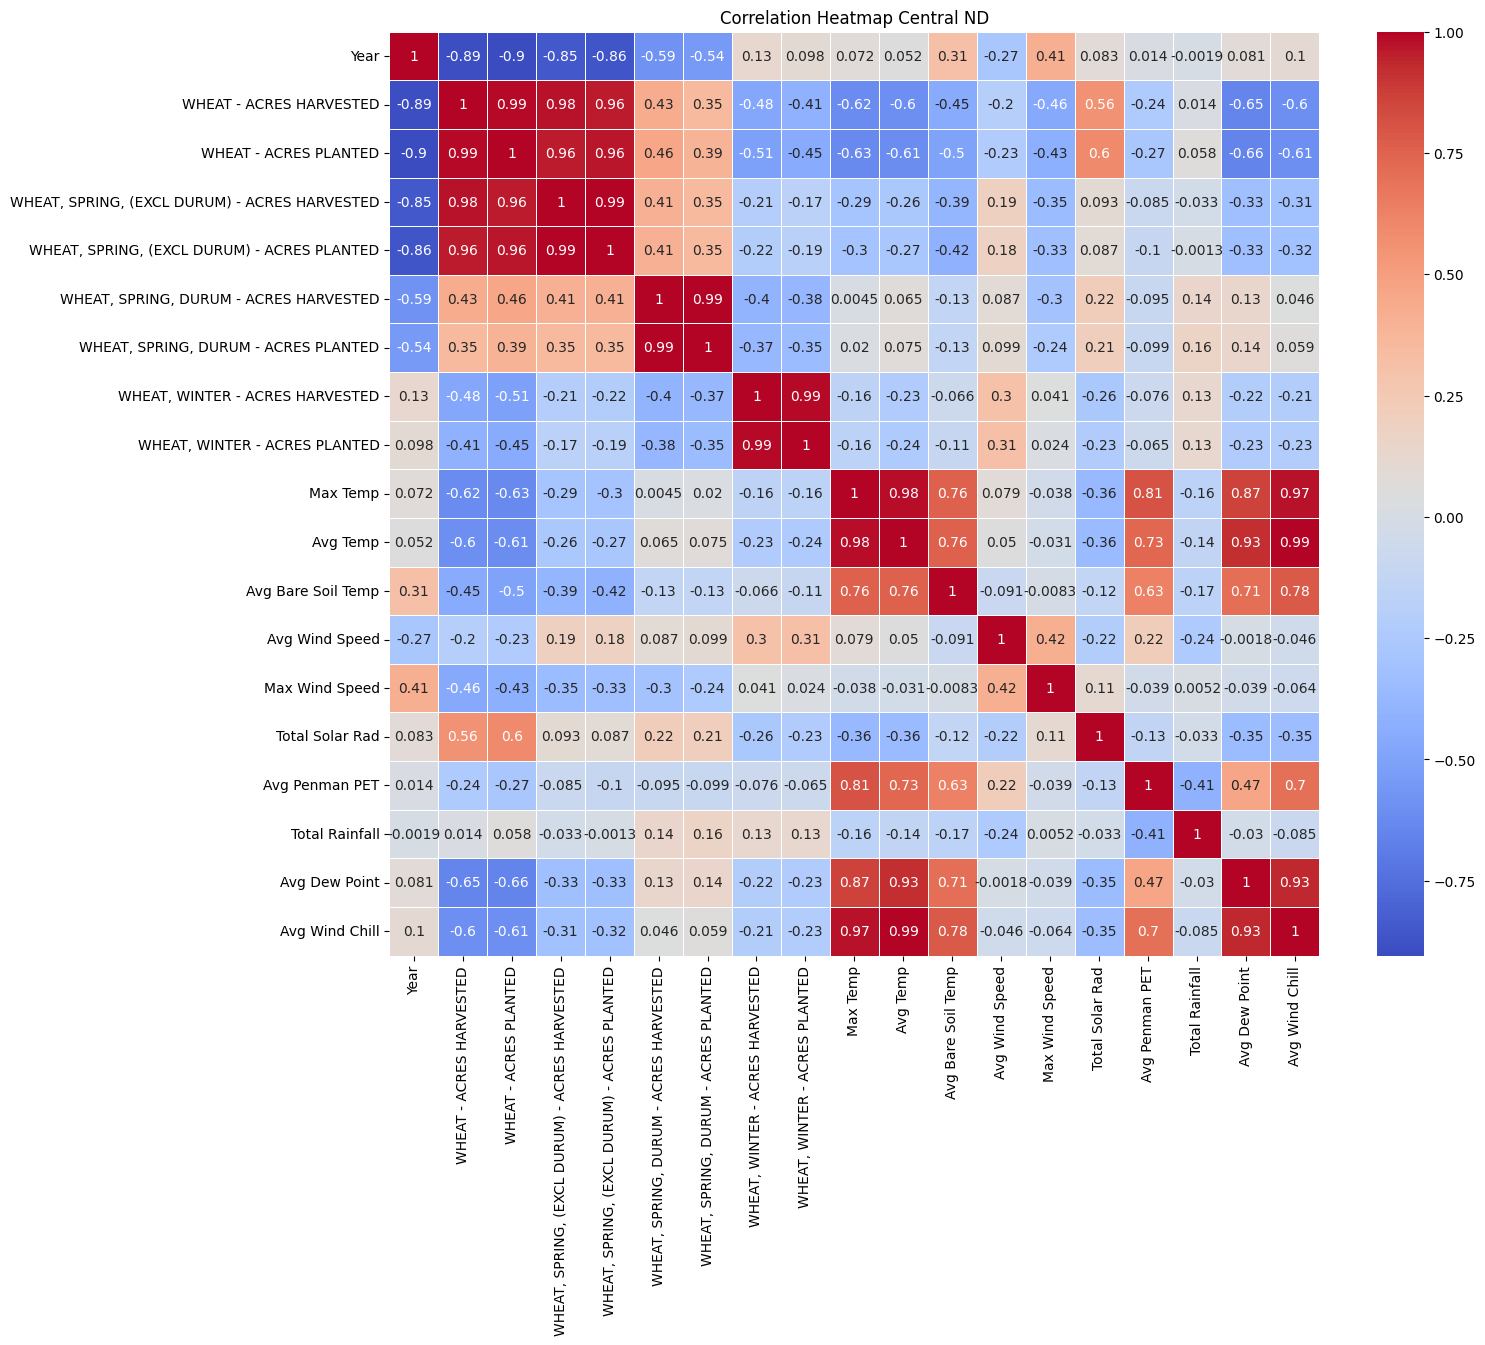

In [ ]:
meteo_production_central_df = df_production_central.merge(df_meteo_central, on=time_column)
correlation_matrix = meteo_production_central_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap Central ND")

# Show the heatmap
plt.show()

<ipython-input-171-acabc29b3f43>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = meteo_production_north_df.corr()


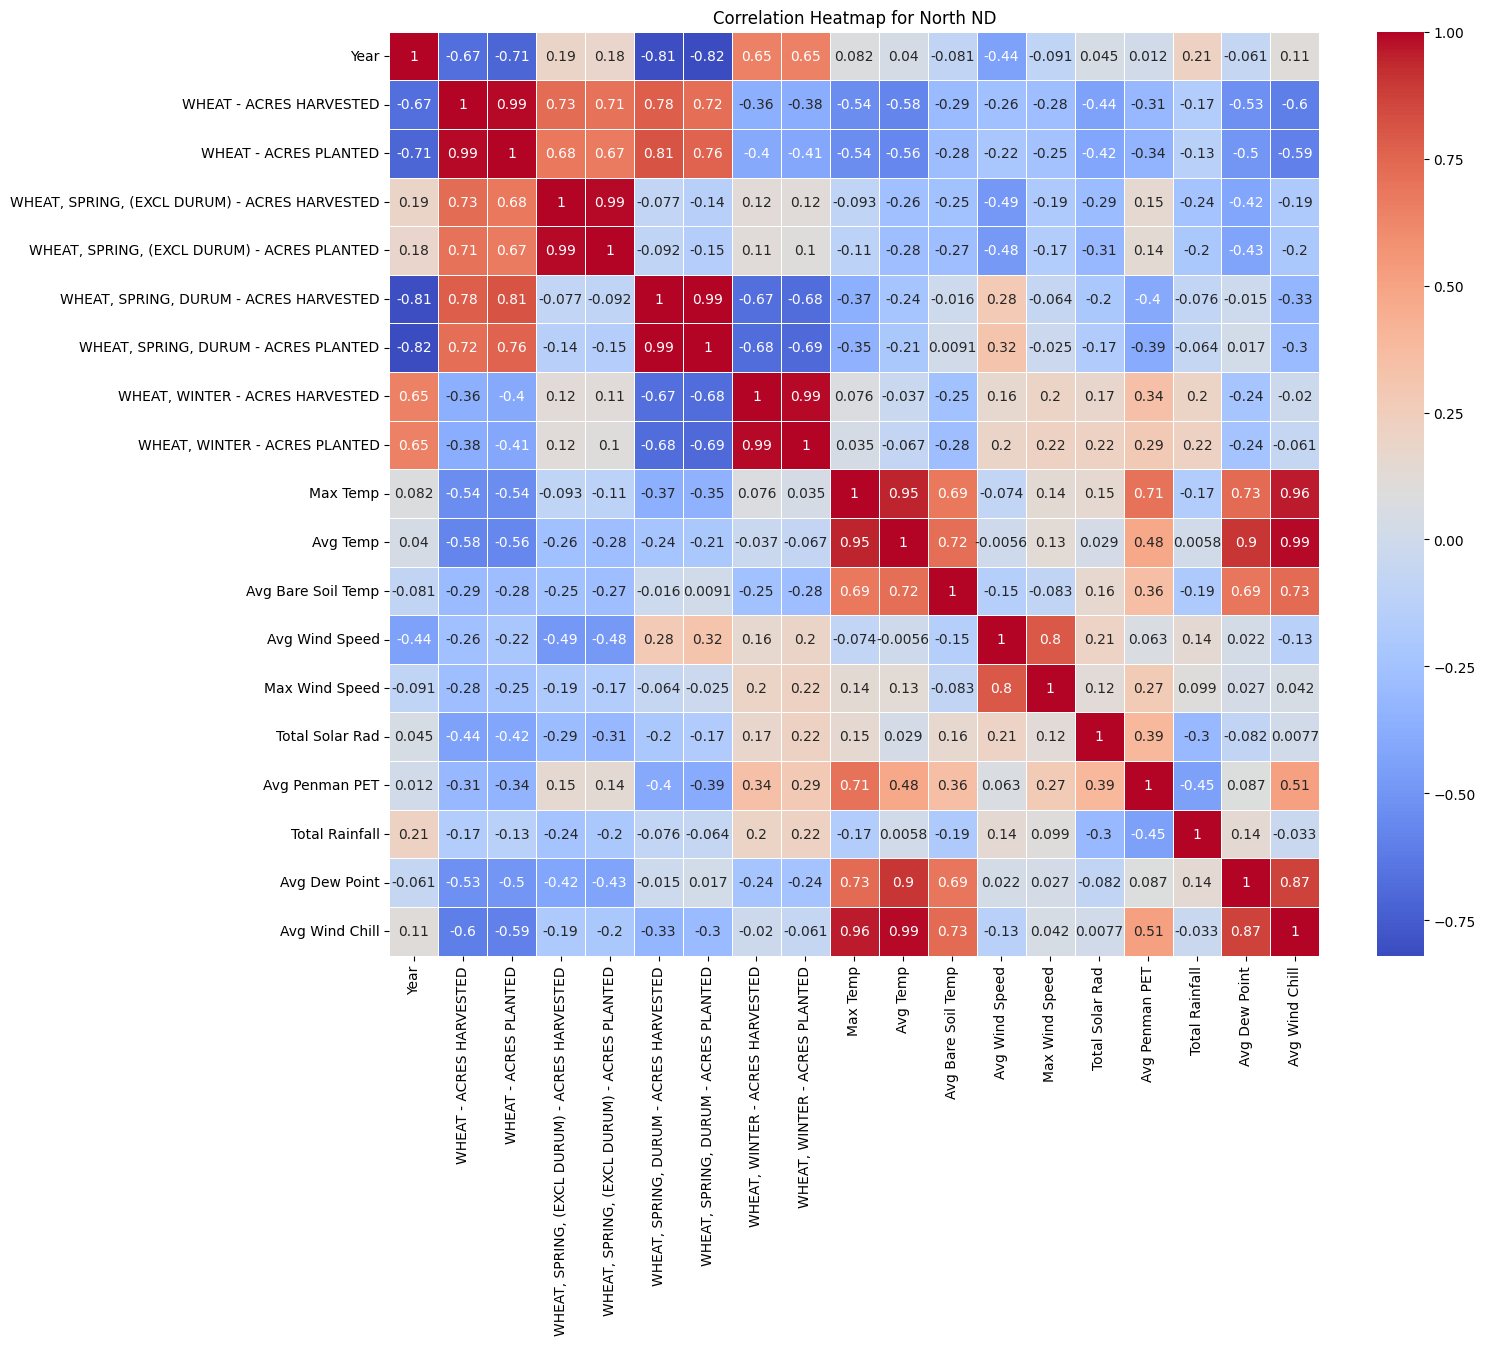

In [ ]:
meteo_production_north_df = df_production_north.merge(df_meteo_north, on=time_column)
correlation_matrix = meteo_production_north_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for North ND")

# Show the heatmap
plt.show()

<ipython-input-172-b8c52aae614d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = meteo_production_south_df.corr()


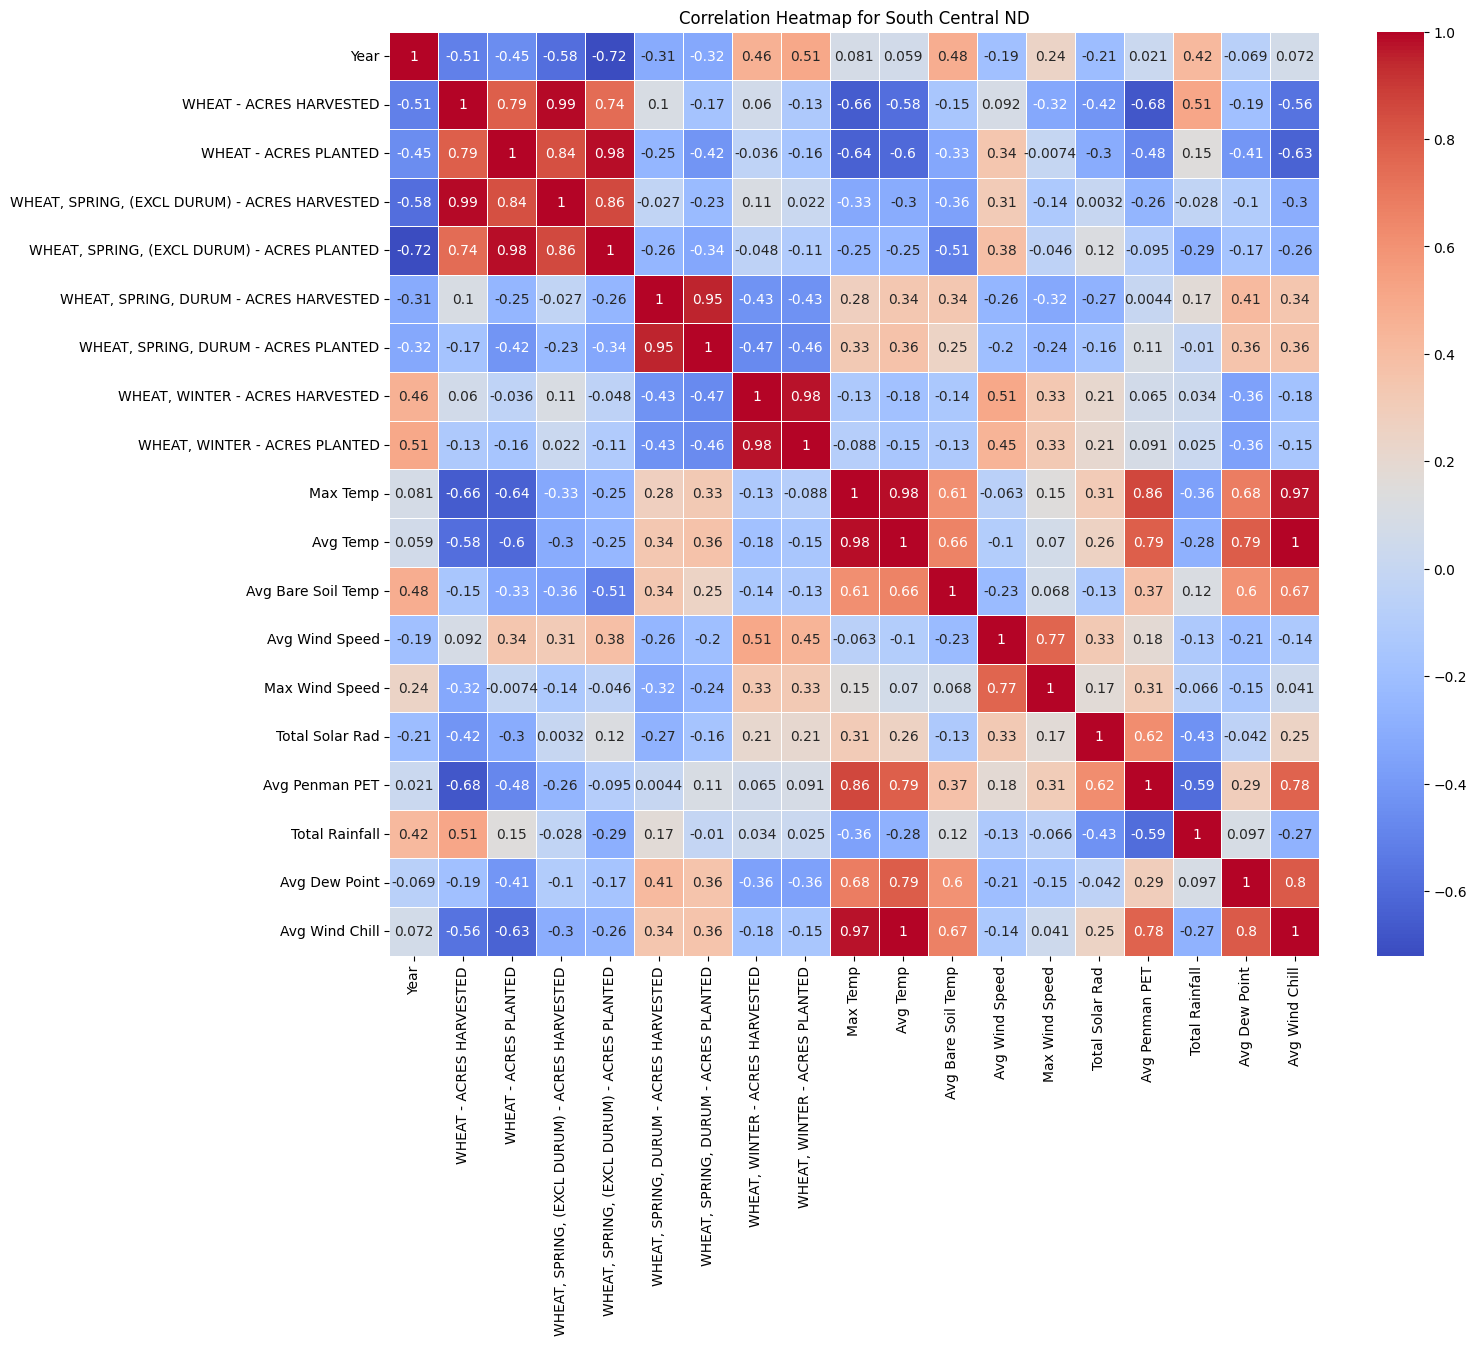

In [ ]:
meteo_production_south_df = df_production_south.merge(df_meteo_south, on=time_column)
correlation_matrix = meteo_production_south_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for South Central ND")

# Show the heatmap
plt.show()

<ipython-input-173-81139a3d45e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = meteo_production_southeast_df.corr()


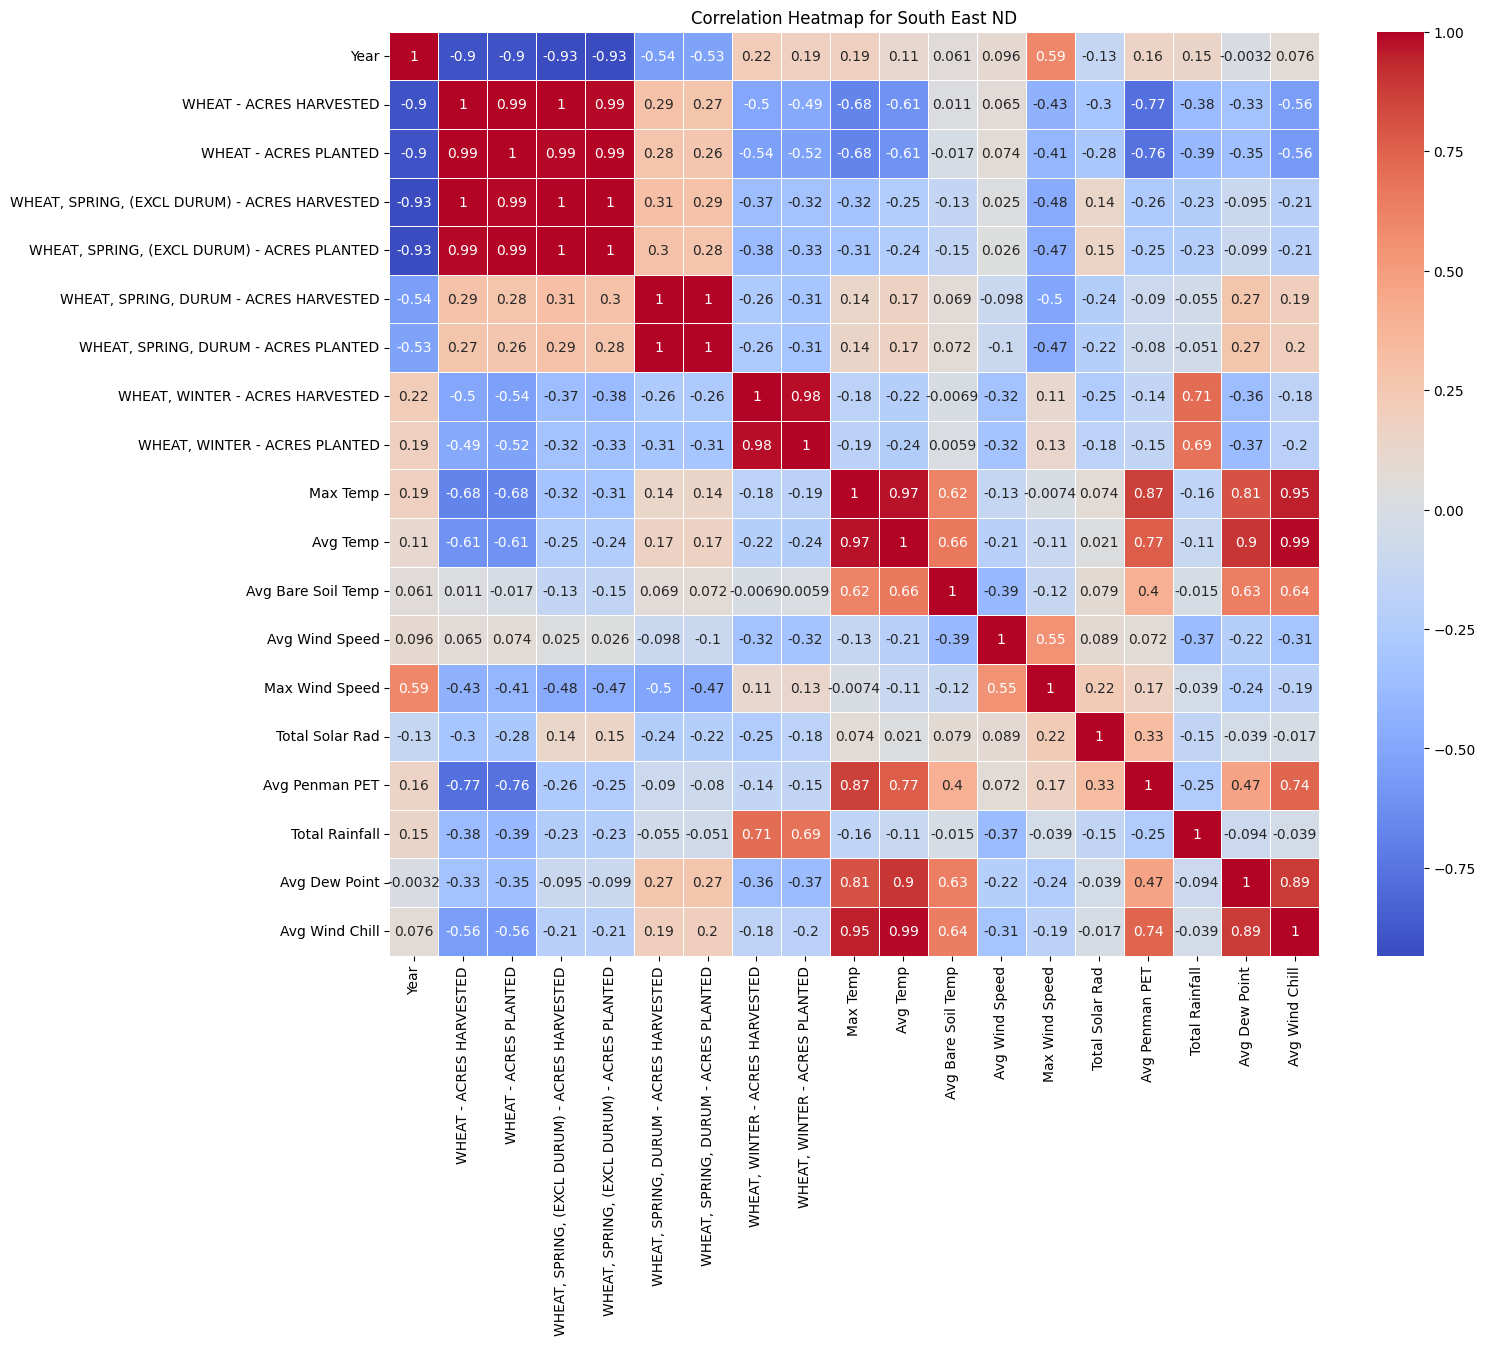

In [ ]:
meteo_production_southeast_df = df_production_south_east.merge(df_meteo_south_east, on=time_column)
correlation_matrix = meteo_production_southeast_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for South East ND")

# Show the heatmap
plt.show()

<ipython-input-174-c5fec909a8c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = meteo_production_southwest_df.corr()


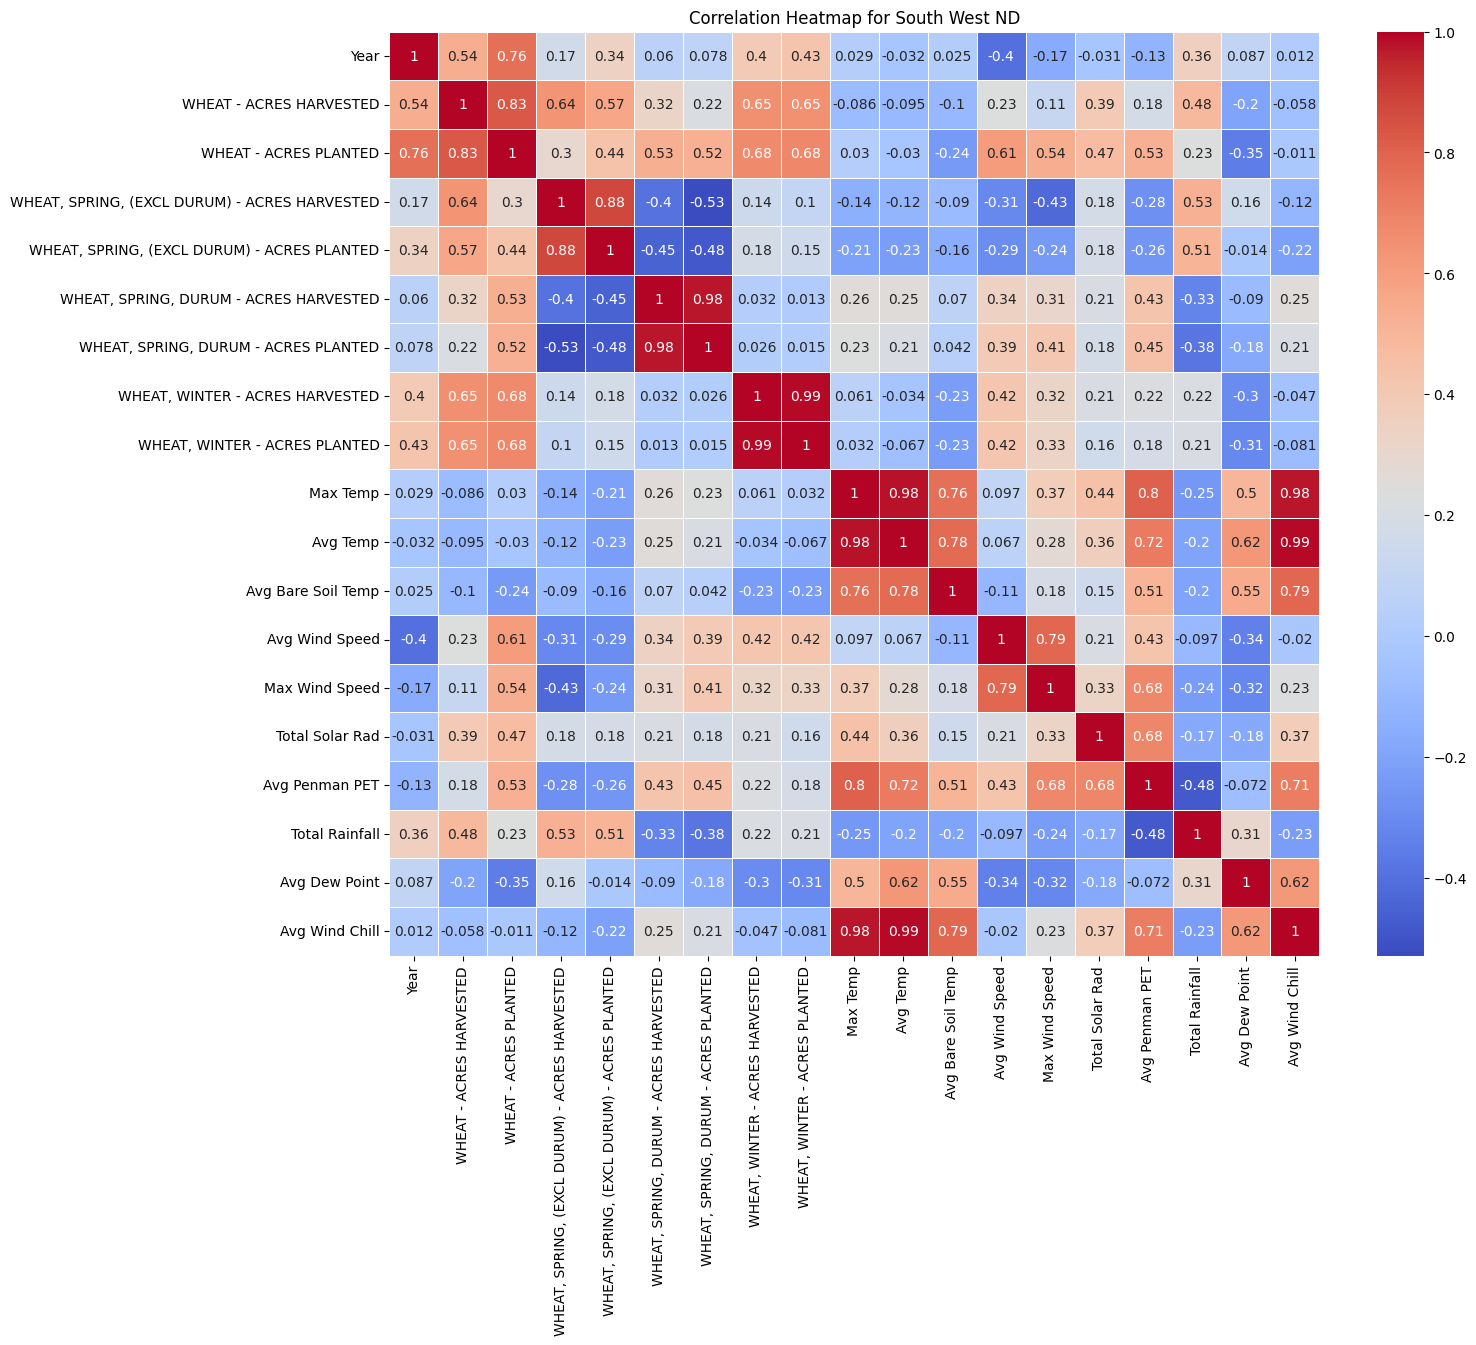

In [ ]:
meteo_production_southwest_df = df_production_south_west.merge(df_meteo_south_west, on=time_column)
correlation_matrix = meteo_production_southwest_df.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for South West ND")

# Show the heatmap
plt.show()

From 5 correlation heatmaps, we realize that there is the strong correlation between some climatic factors with the acres planted and harvested. <br>
But each region shows a different correlation, for example, there are climatic factors such as Max Temperature, Avg Wind chill Temperature  that are positively correlated with acres planted, harvested durum in the South Central ND but negatively correlated in North ND.<br>
--> Therefore, we should divide it into many regions for analysis instead of combining it all<br>

Moreover, we also noticed that the acres harvested doesn't always have correlation≈1 with the acres planted (as shown in south central and south west ND of spring wheat - exclu durum). So we have the idea to predict the acres harvested based on acres planted and some climatic factors.<br>

Also, the correlation between spring wheat - exclu durum and climatic factors follow what we found in the research such as the negatively correlation with Max Temp, Avg Wind, PET and positively correlation with Rainfall. Additionally, the spring wheat is susceptible to climate change ( as shown in the following graphs) but accounts for a large proportion of wheat production in North Dakota <br>
--> Focus on the **spring wheat** in the south, south west of ND

#Compare Acres Harvested vs Acres Planted of Spring Wheat in 3 region of North Dakota

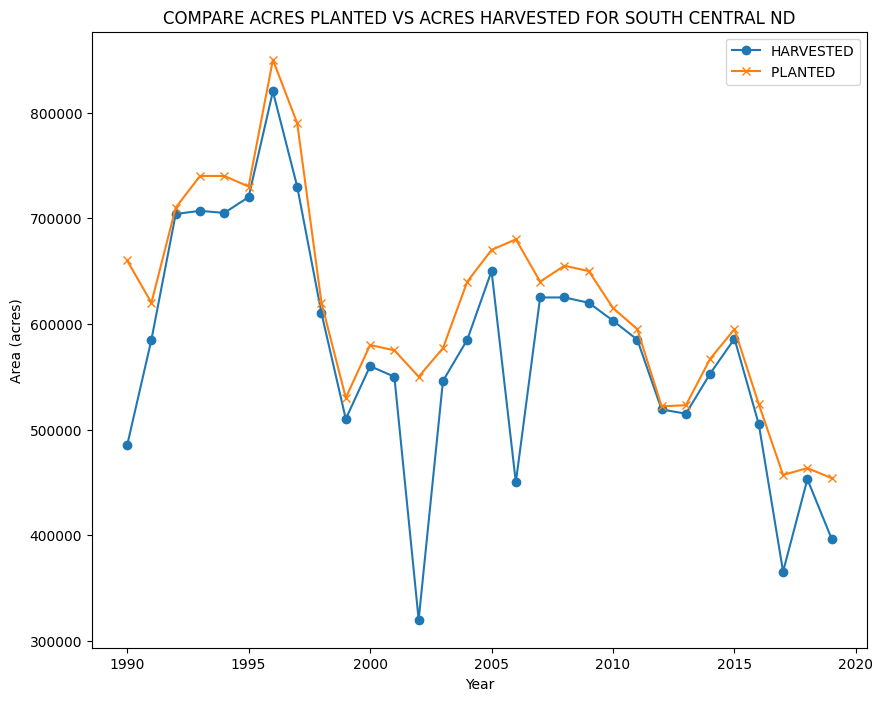

In [ ]:
# Plot the data with three lines
plt.figure(figsize=(10, 8))
plt.plot(df_production_south['Year'], df_production_south['WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED'], label='HARVESTED', marker = 'o')
plt.plot(df_production_south['Year'], df_production_south['WHEAT, SPRING, (EXCL DURUM) - ACRES PLANTED'], label='PLANTED ', marker = 'x')

# Set plot labels and title
plt.ylabel('Area (acres)')
plt.xlabel('Year')
plt.title('COMPARE ACRES PLANTED VS ACRES HARVESTED FOR SOUTH CENTRAL ND')

# Display legend
plt.legend()

# Display the plot
plt.show()

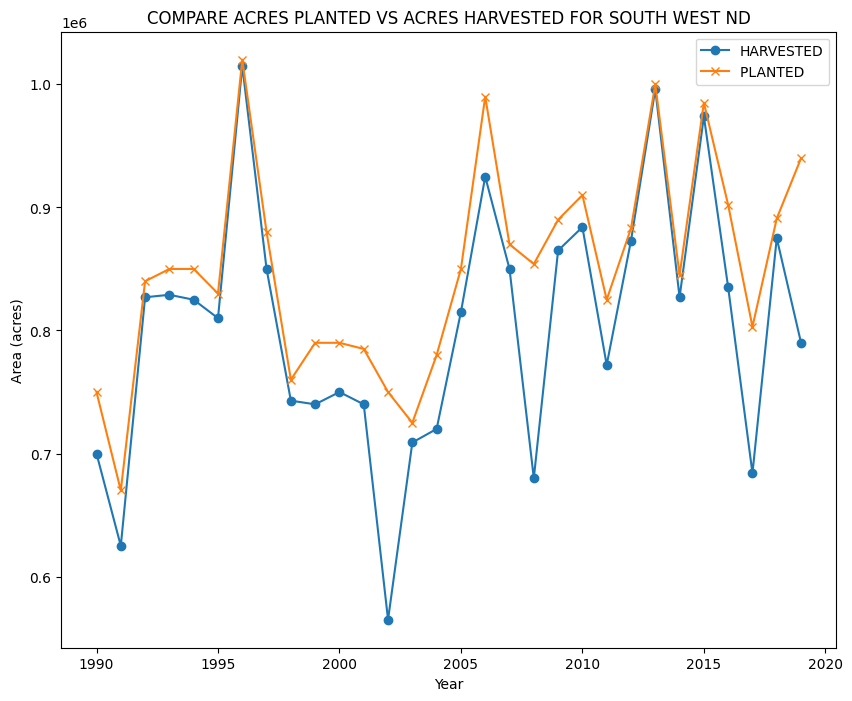

In [ ]:
# Plot the data with three lines
plt.figure(figsize=(10, 8))
plt.plot(df_production_south_west['Year'], df_production_south_west['WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED'], label='HARVESTED', marker = 'o')
plt.plot(df_production_south_west['Year'], df_production_south_west['WHEAT, SPRING, (EXCL DURUM) - ACRES PLANTED'], label='PLANTED ', marker = 'x')

# Set plot labels and title
plt.ylabel('Area (acres)')
plt.xlabel('Year')
plt.title('COMPARE ACRES PLANTED VS ACRES HARVESTED FOR SOUTH WEST ND')

# Display legend
plt.legend()

# Display the plot
plt.show()

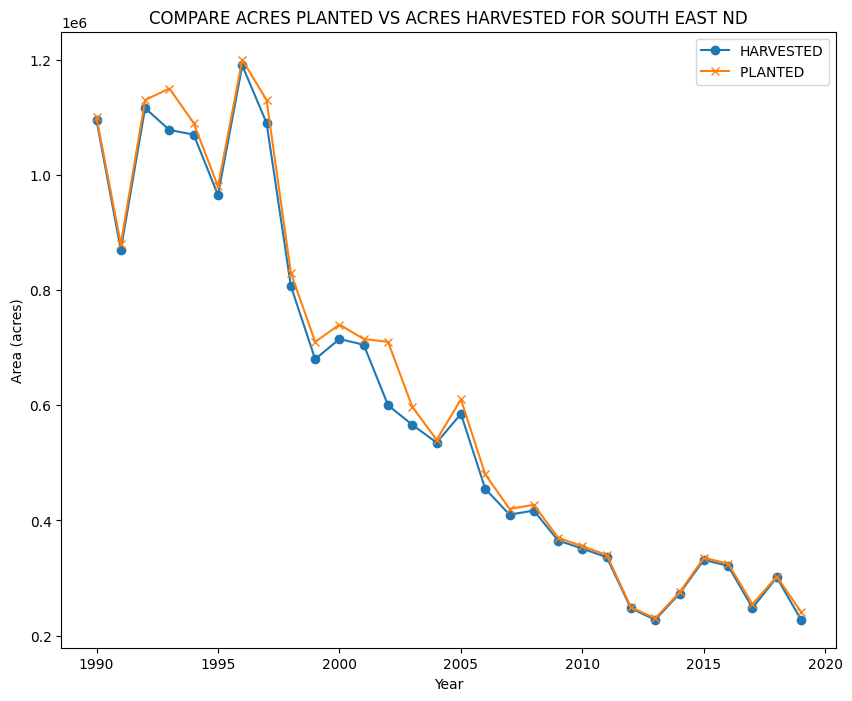

In [ ]:
# Plot the data with three lines
plt.figure(figsize=(10, 8))
plt.plot(df_production_south_east['Year'], df_production_south_east['WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED'], label='HARVESTED', marker = 'o')
plt.plot(df_production_south_east['Year'], df_production_south_east['WHEAT, SPRING, (EXCL DURUM) - ACRES PLANTED'], label='PLANTED ', marker = 'x')

# Set plot labels and title
plt.ylabel('Area (acres)')
plt.xlabel('Year')
plt.title('COMPARE ACRES PLANTED VS ACRES HARVESTED FOR SOUTH EAST ND')

# Display legend
plt.legend()

# Display the plot
plt.show()